In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (10, 6)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn


# Input data files are available in the "../input/" directory.

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [5]:
df = pd.read_csv('data/train.csv', dtype = {'piscina':'int32', 'gimnasio':'int32', 'usosmultiples':'int32', 'escuelascercanas':'int32',
                                         'centroscomercialescercanos':'int32', 'precio':'int32', 'id':'int32'},parse_dates = ['fecha'])

In [6]:
#Quito todos los NaN y los pasa a valor 0
df = df.replace(np.nan, 0)

In [7]:
#Continuar casteando valores que ocupan demasiada memoria (ahora puedo hacerlo en aquellos que tenian NaN)
df = df.astype({'banos':'int32', 'antiguedad':'int32', 'garages':'int32', 'habitaciones':'int32', 'metroscubiertos':'int32', 'metrostotales':'int32',
                    'idzona':'int32'})

In [8]:
#Establecer como category el tipo de propiedad
categorias = df['tipodepropiedad']
categorias = categorias.astype('category').dtypes
df = df.astype({'tipodepropiedad':'category'})

# Empiezo a trabajar:

[[<matplotlib.axis.XTick at 0x7fbfdd5d86a0>,

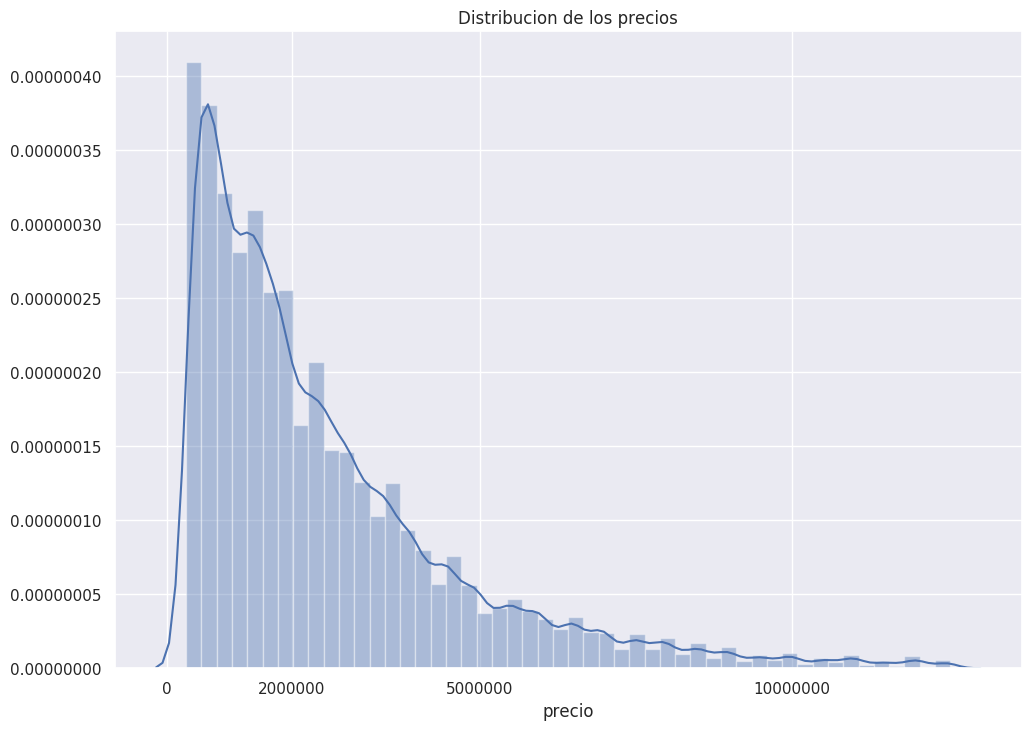

In [9]:
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plot=sns.distplot(df['precio'])
plot.set_title("Distribucion de los precios")
plot.set(xticks=(0,2000000,5000000,10000000))


Divido en 3 grupos de precios:
* Grupo 1: menor a 2000000
* Grupo 2: entre 2000000 y 5000000
* Grupo 3: mayor a 5000000

In [10]:
df_1=df[df['precio']<2000000]

df_2=df[ (df['precio']>2000000) & (df['precio']<5000000) ]

df_3=df[(df['precio']>5000000)]

# ¿Las palabras de los titulos cambian segun el grupo?

In [11]:
#Funcion para contar palabras en una columna
from collections import Counter
def contar_palabras_en_columna(dataframe,columna):
    #Hacemos una lista con todas las palabras que aparecen en los titulos 
    #y sus apariciones, sacando los chars "( ) ,"
    contador_palabras_avisos = Counter(" ".join(map(str,dataframe[columna].\
    values.tolist())).lower().replace("(",'').replace(")",'').replace(",",' ').split(" ")).items()

    #Formo un DF con esa lista

    contador_palabras_avisos = list(contador_palabras_avisos)


    contador_palabras_avisos_df = pd.DataFrame(contador_palabras_avisos)
    contador_palabras_avisos_df.head()

    contador_palabras_avisos_df.columns=['palabra','apariciones']
    contador_palabras_avisos_df=contador_palabras_avisos_df.set_index('palabra')

    #Saco las palabras triviales del df (fui encontrandolas a medida que ploteaba los resultados)
    triviales=['','-','de','con','en','y','o','a','para','la','las','al','el','los','/','por','del','san','santa','0','1','2','3','4','que','se','un','una','dos','te','no','es','tu','su','muy','m2']
    contador_palabras_avisos_df=contador_palabras_avisos_df.drop(triviales)
    
    return contador_palabras_avisos_df.sort_values(by='apariciones',ascending=False)

    

In [12]:
datos=contar_palabras_en_columna(df,'titulo').head(18)


In [13]:
datos.head()

,apariciones
palabra,
casa,121164
venta,103775
departamento,37912
excelente,12197
lomas,11074


Text(0, 0.5, 'Palabras')

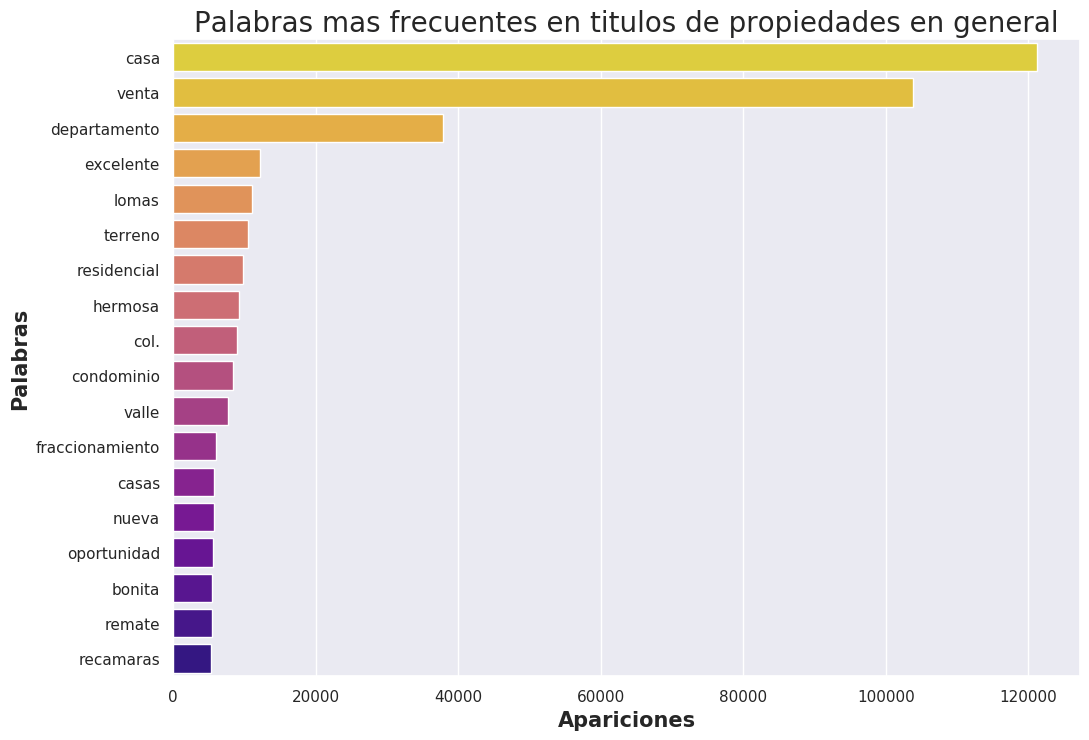

In [14]:

plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="plasma_r")
plot.set_title('Palabras mas frecuentes en titulos de propiedades en general', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

# Titulos Grupo 1

In [15]:
datos=contar_palabras_en_columna(df_1,'titulo').head(18)

Text(0, 0.5, 'Palabras')

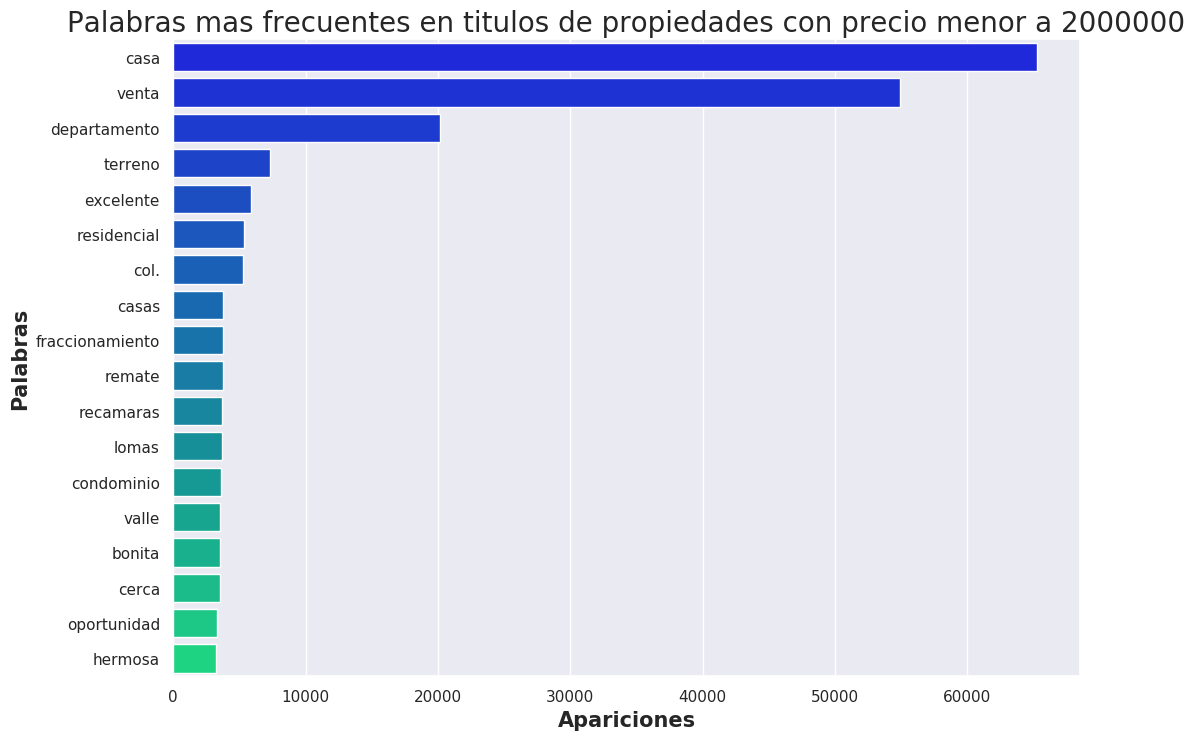

In [16]:
plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="winter")
plot.set_title('Palabras mas frecuentes en titulos de propiedades con precio menor a 2000000', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

# Titulos Grupo 2

In [17]:
datos=contar_palabras_en_columna(df_2,'titulo').head(18)

Text(0, 0.5, 'Palabras')

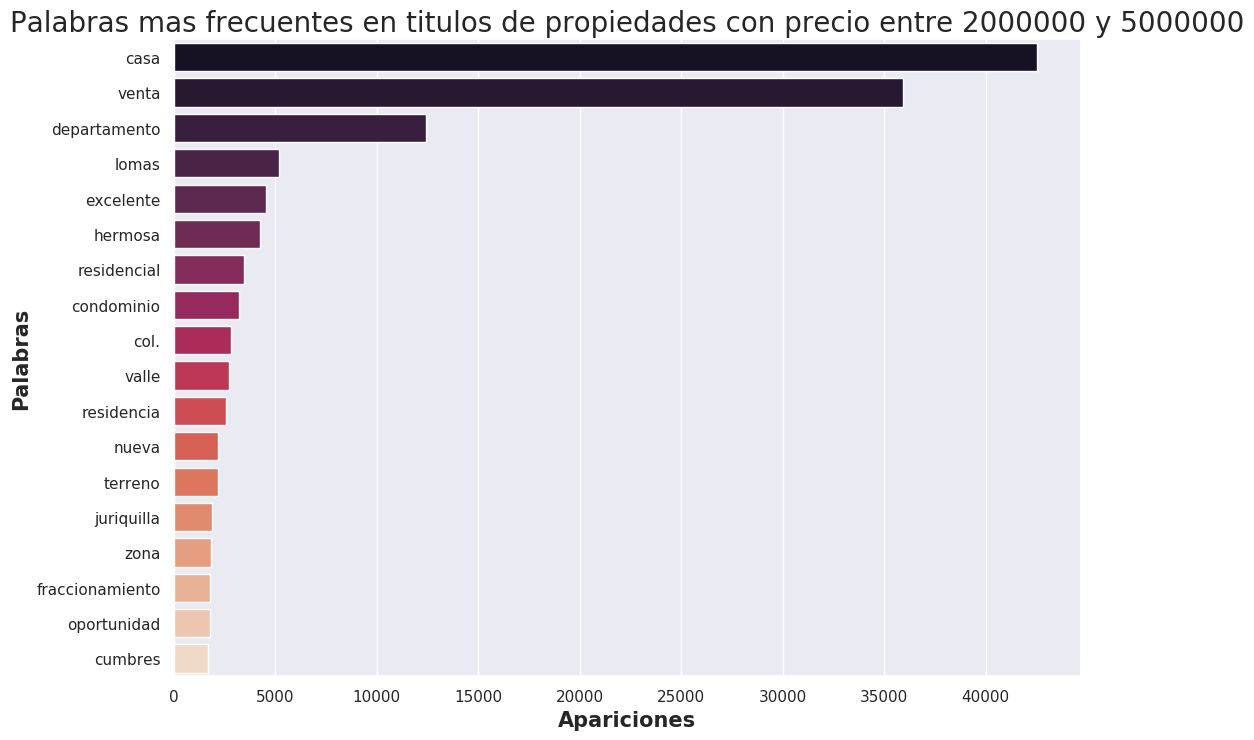

In [18]:
plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="rocket")
plot.set_title('Palabras mas frecuentes en titulos de propiedades con precio entre 2000000 y 5000000', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

# Titulos Grupo 3

In [19]:
datos=contar_palabras_en_columna(df_3,'titulo').head(18)

Text(0, 0.5, 'Palabras')

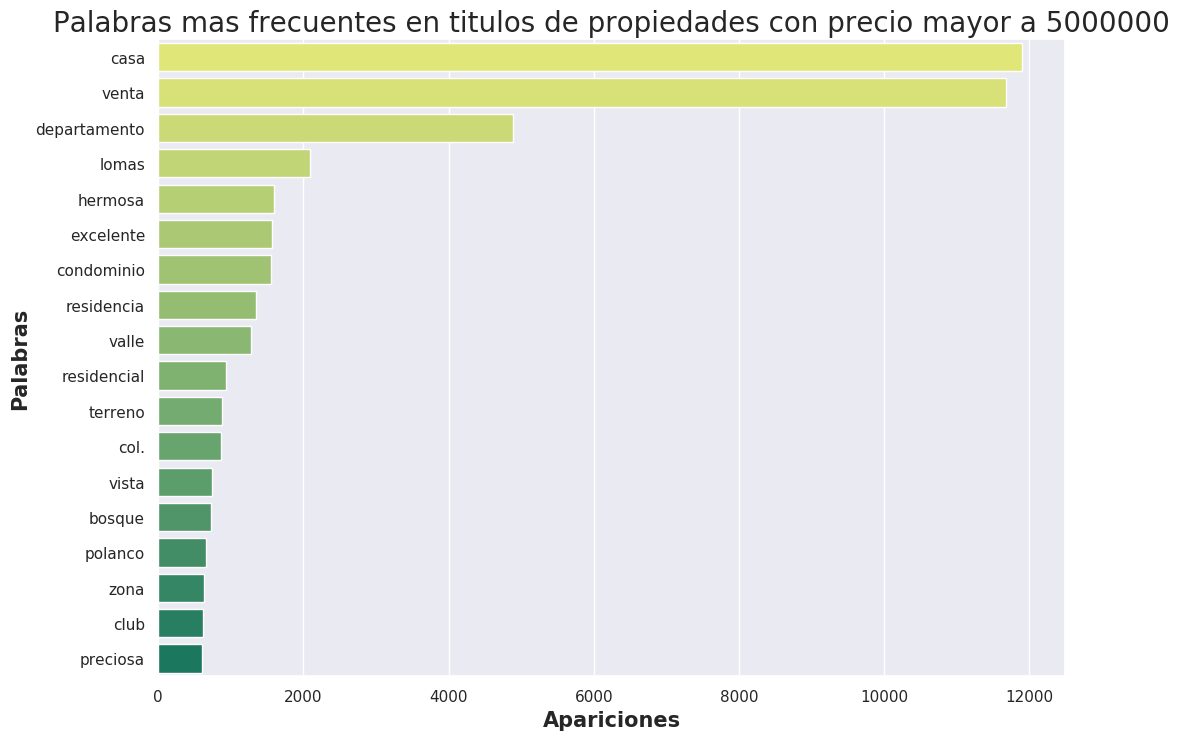

In [20]:
plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="summer_r")
plot.set_title('Palabras mas frecuentes en titulos de propiedades con precio mayor a 5000000', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

# ¿Hay palabras que se repitan en descripciones de determinado grupo de propiedades?

In [21]:
datos=contar_palabras_en_columna(df,'descripcion').head(18)

Text(0, 0.5, 'Palabras')

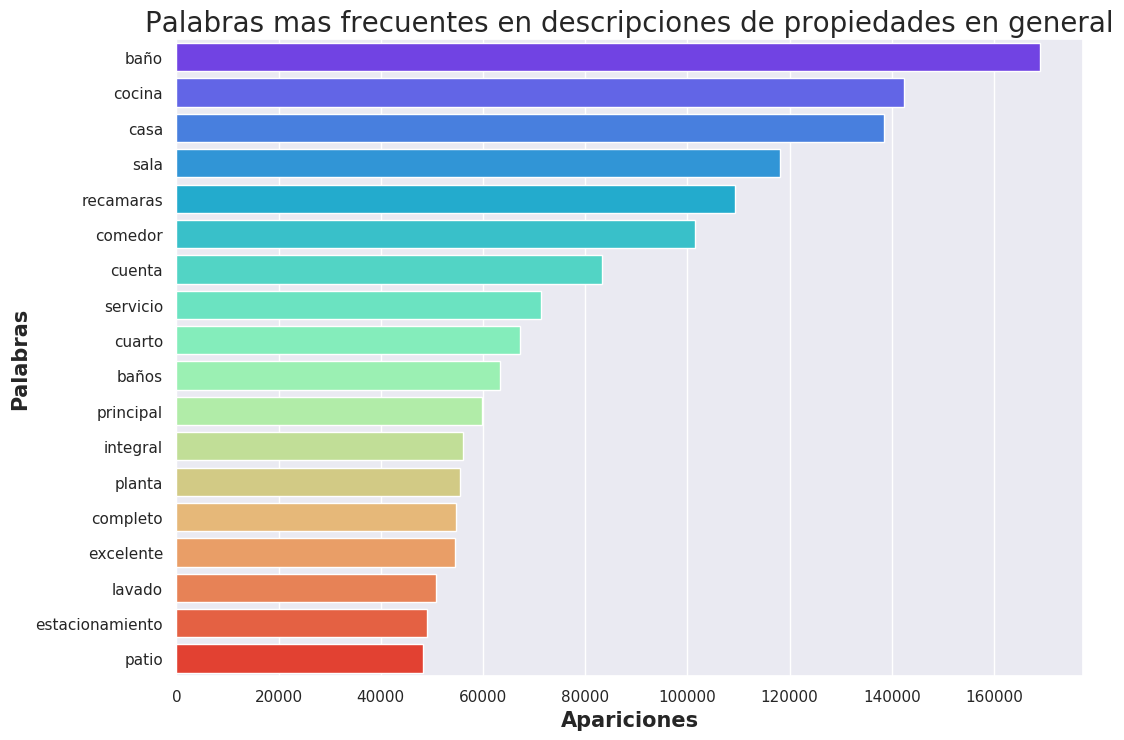

In [22]:
plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="rainbow")
plot.set_title('Palabras mas frecuentes en descripciones de propiedades en general', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

In [23]:
datos=contar_palabras_en_columna(df_1,'descripcion').head(18)

Text(0, 0.5, 'Palabras')

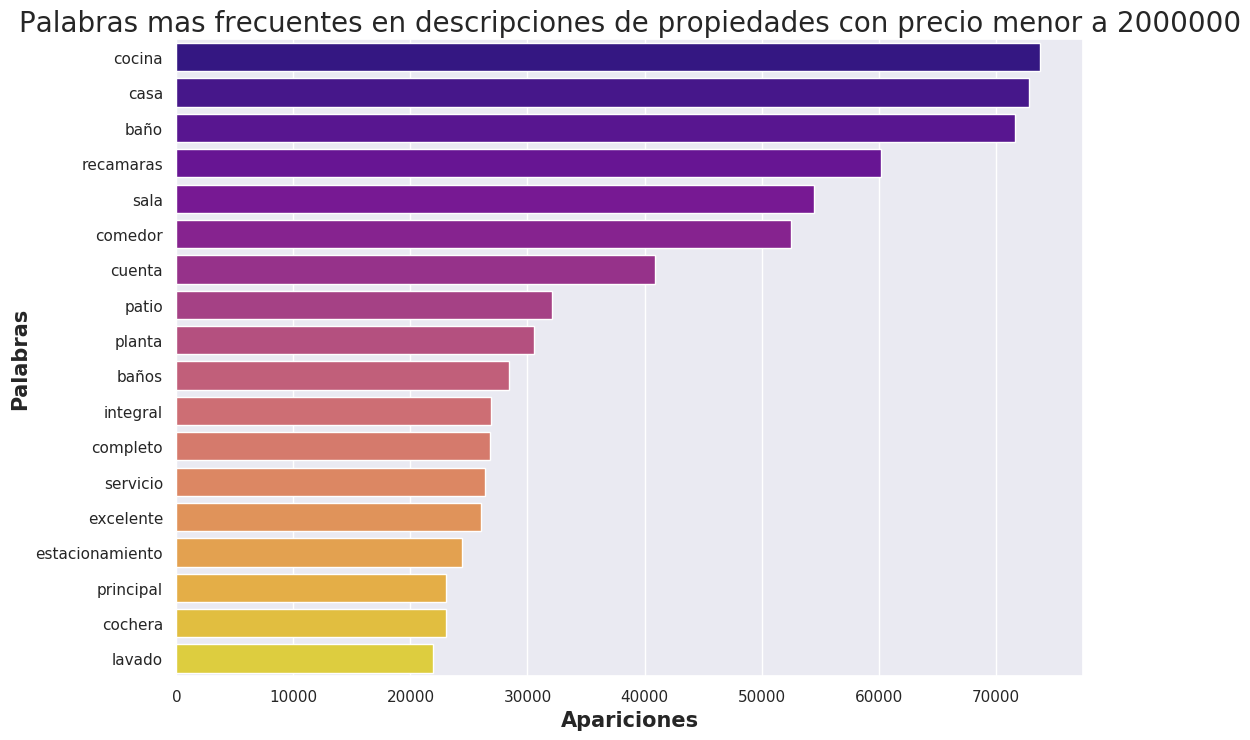

In [24]:
plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="plasma")
plot.set_title('Palabras mas frecuentes en descripciones de propiedades con precio menor a 2000000', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

In [25]:
datos=contar_palabras_en_columna(df_2,'descripcion').head(18)

Text(0, 0.5, 'Palabras')

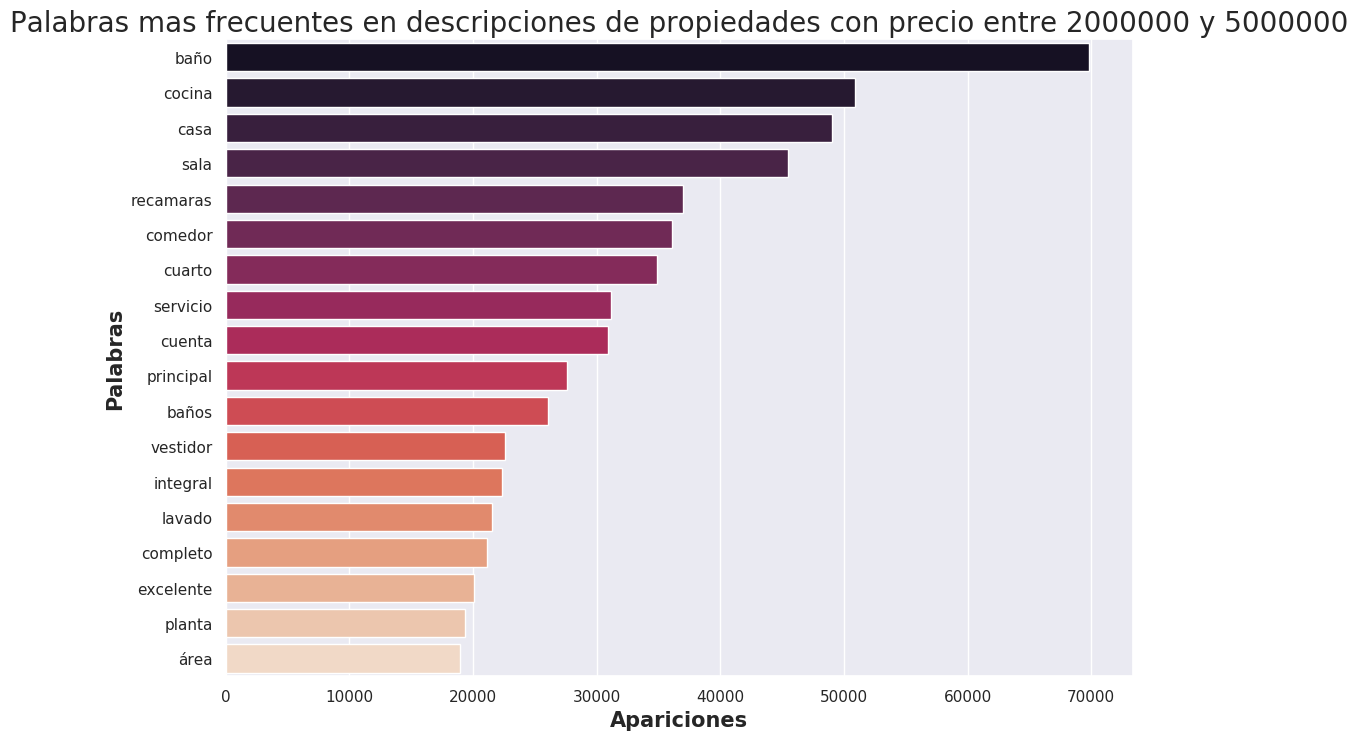

In [26]:
plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="rocket")
plot.set_title('Palabras mas frecuentes en descripciones de propiedades con precio entre 2000000 y 5000000', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

In [27]:
datos=contar_palabras_en_columna(df_3,'descripcion').head(18)

Text(0, 0.5, 'Palabras')

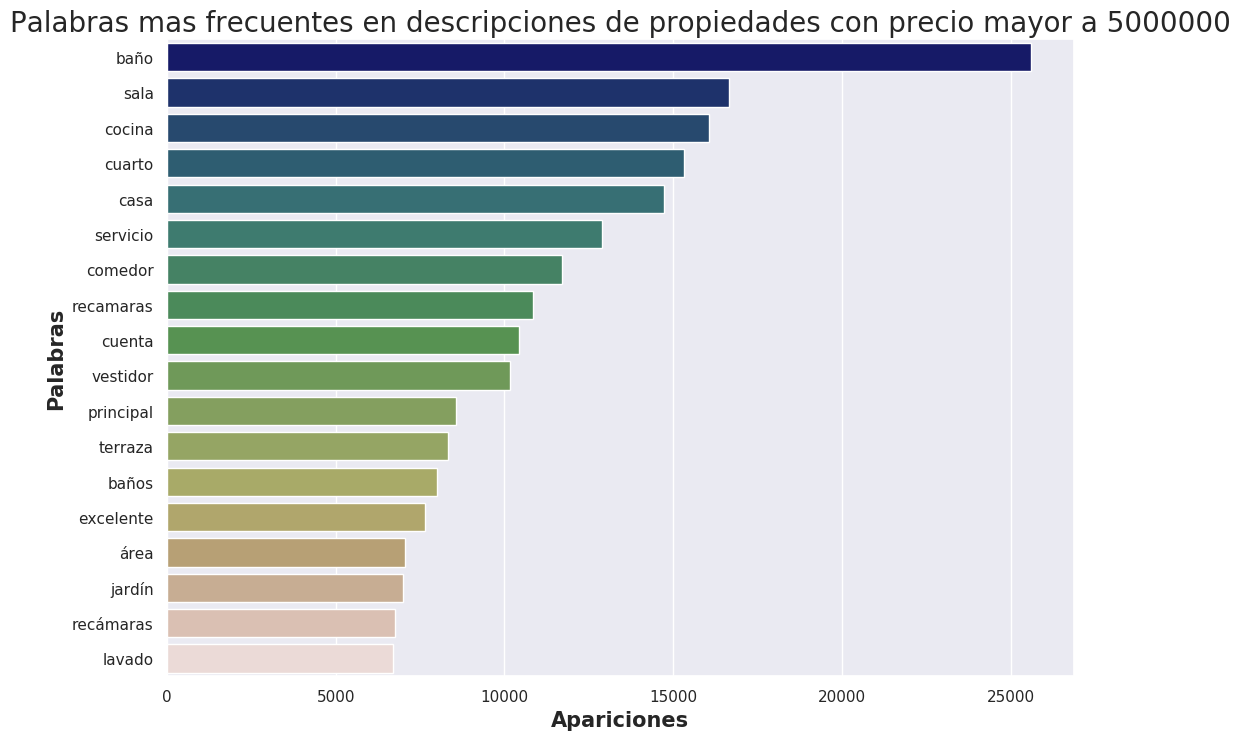

In [28]:
plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="gist_earth")
plot.set_title('Palabras mas frecuentes en descripciones de propiedades con precio mayor a 5000000', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

**Conclusiones:**
Se puede observar que:
* La palabra 'baño' aparece masomenos en casi todas las propiedades sin importar el precio
* Idem para las palabras 'excelente' 'baños' 'servicio' 'cuenta' y 'lavado'
* Las palabras 'cocina' y 'casa' aparecen mucho mas en propiedades de precio menor a 2000000
* La palabra 'jardín' aparece mas seguido en propiedades de precio mayor a 5000000
* Las palabras 'patio' 'cochera' solo en las de precio menor a 2000000
* Las palabras 'vestidor' y 'cuarto' no aparecen significativamente en las de precio menor a 2000000 y si en el resto
* Las palabras 'estacionamiento' ' no tiene importancia en las de precio mayor a 5000000


# ¿Hay palabras que se caracterizan por aparecer en algun grupo en particular?

In [29]:
#Formo un df con todas las palabras que aparecen y su cantidad de apariciones
datos=contar_palabras_en_columna(df,'descripcion')

In [30]:
#Formo 3 dfs con las palabras que aparecen en cada grupo y su cantidad de apariciones dividido el tamaño del grupo
#Nota: Divido por el tamaño del grupo para evitar que un grupo mas grande que otro se acapare todo el porcentaje
# de cantidad de palabras. Quiero saber como se distribuyen las palabras en cada grupo pero teniendo en cuenta que los
# tamaños de cada uno son diferentes
datos_1=contar_palabras_en_columna(df_1,'descripcion')/df_1.shape[0]
datos_2=contar_palabras_en_columna(df_2,'descripcion')/df_2.shape[0]
datos_3=contar_palabras_en_columna(df_3,'descripcion')/df_3.shape[0]

In [31]:
datos_1.columns=['apariciones_en_grupo_1']
datos_2.columns=['apariciones_en_grupo_2']
datos_3.columns=['apariciones_en_grupo_3']

In [32]:
datos=datos.merge(datos_1,how='outer',right_index=True,left_index=True)
datos=datos.merge(datos_2,how='outer',right_index=True,left_index=True)
datos=datos.merge(datos_3,how='outer',right_index=True,left_index=True)

In [33]:
datos.head()

,apariciones,apariciones_en_grupo_1,apariciones_en_grupo_2,apariciones_en_grupo_3
palabra,,,,
a,1,NaN,0.000012,NaN
\t,260,0.000979,0.001201,0.001332
\t\t,10,0.000031,0.000025,0.000144
\t\t\t,10,0.000031,0.000049,0.000072
\t\t\t\t,2,NaN,0.000012,0.000036


In [34]:
datos.shape

(410645, 4)

In [35]:
datos[datos['apariciones']>=500].shape

(2136, 4)

### Se puede observar que pocas palabras se repiten mas de 500 veces. Me quedo con esas palabras

In [36]:
datos=datos[datos['apariciones']>=500]

In [37]:
datos.head()

,apariciones,apariciones_en_grupo_1,apariciones_en_grupo_2,apariciones_en_grupo_3
palabra,,,,
\n,6102,0.027704,0.023380,0.021448
\n\n,1579,0.006783,0.006731,0.005434
\n\n*,1032,0.005389,0.003188,0.002879
\n\n-,1684,0.006564,0.007197,0.009141
\n\n2,989,0.004566,0.004095,0.002267


In [38]:
datos['total_apariciones']=datos['apariciones']
datos['apariciones']=(datos['apariciones_en_grupo_1']+datos['apariciones_en_grupo_2']+datos['apariciones_en_grupo_3'])

In [39]:
#Saco el porcentaje de apariciones de cada palabra en cada grupo (previamente habiendo tenido en cuenta
# que los tamaños de cada grupo son diferentes)
datos['apariciones_en_grupo_1']=datos['apariciones_en_grupo_1']/(datos['apariciones'])
datos['apariciones_en_grupo_2']=datos['apariciones_en_grupo_2']/(datos['apariciones'])
datos['apariciones_en_grupo_3']=datos['apariciones_en_grupo_3']/(datos['apariciones'])

In [40]:
datos.drop('apariciones',axis=1,inplace=True)
datos.head()

,apariciones_en_grupo_1,apariciones_en_grupo_2,apariciones_en_grupo_3,total_apariciones
palabra,,,,
\n,0.381954,0.322339,0.295706,6102
\n\n,0.357985,0.355227,0.286789,1579
\n\n*,0.470418,0.278263,0.251318,1032
\n\n-,0.286612,0.314250,0.399138,1684
\n\n2,0.417846,0.374698,0.207456,989


## Palabras que se destacaron por aparecer en el grupo 1 (precio menor a 2000000)

Text(0, 0.5, 'Porcentaje de Apariciones')

/home/luciano/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/luciano/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


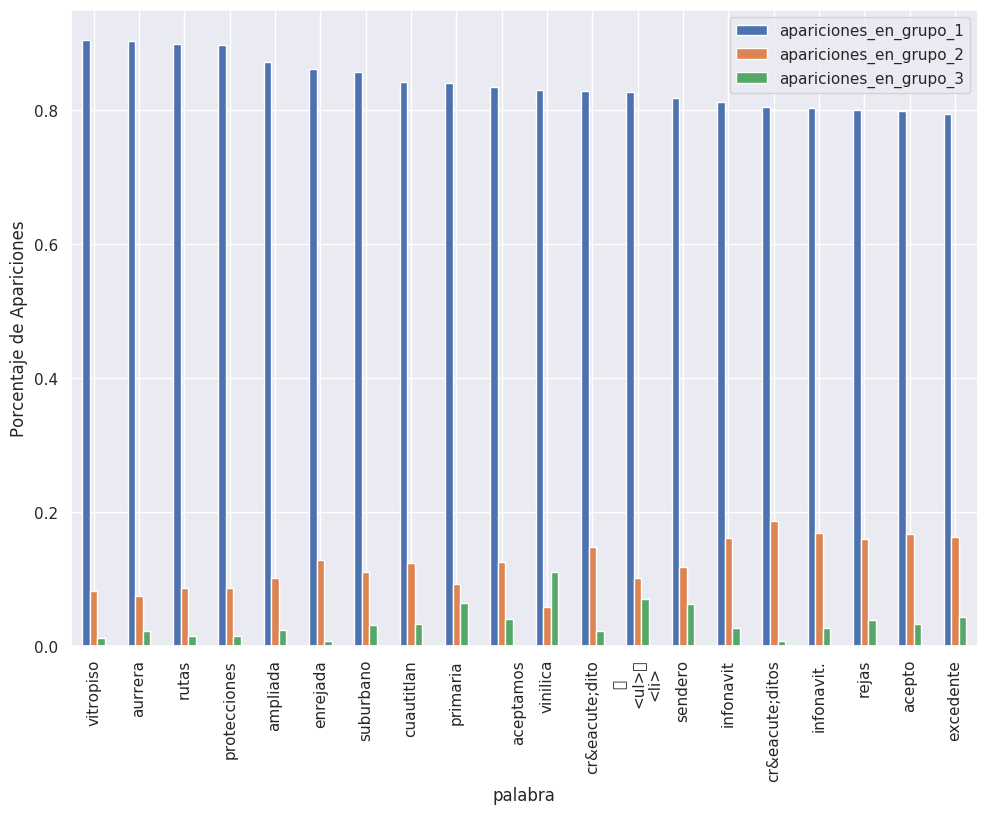

In [41]:
 
ax = datos.sort_values(by='apariciones_en_grupo_1',ascending=False).head(20).plot(kind='bar', y=["apariciones_en_grupo_1", "apariciones_en_grupo_2","apariciones_en_grupo_3"])
ax.set_ylabel('Porcentaje de Apariciones')

## Palabras que se destacaron por aparecer en el grupo 2 (precio entre 2000000 y 5000000)

Text(0, 0.5, 'Porcentaje de Apariciones')

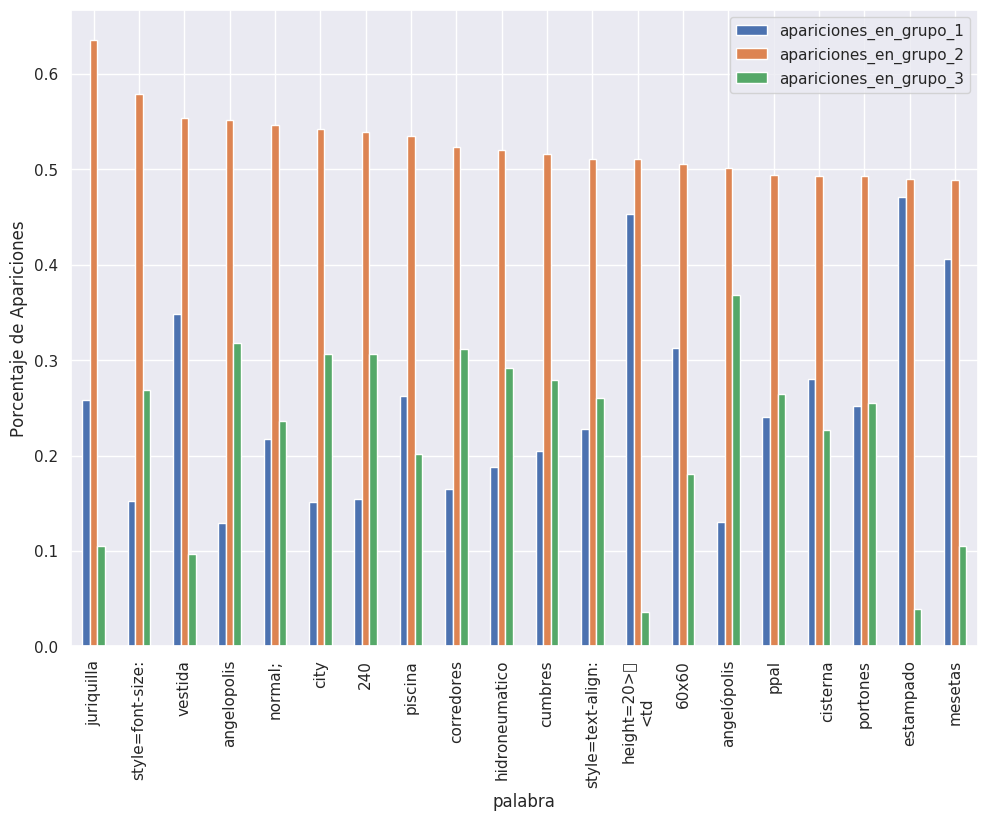

In [42]:
 ax = datos.sort_values(by='apariciones_en_grupo_2',ascending=False).head(20).plot(kind='bar', y=["apariciones_en_grupo_1", "apariciones_en_grupo_2","apariciones_en_grupo_3"])
 ax.set_ylabel('Porcentaje de Apariciones')

## Palabras que se destacaron por aparecer en el grupo 3 (precio mayor a 5000000)

Text(0, 0.5, 'Porcentaje de Apariciones')

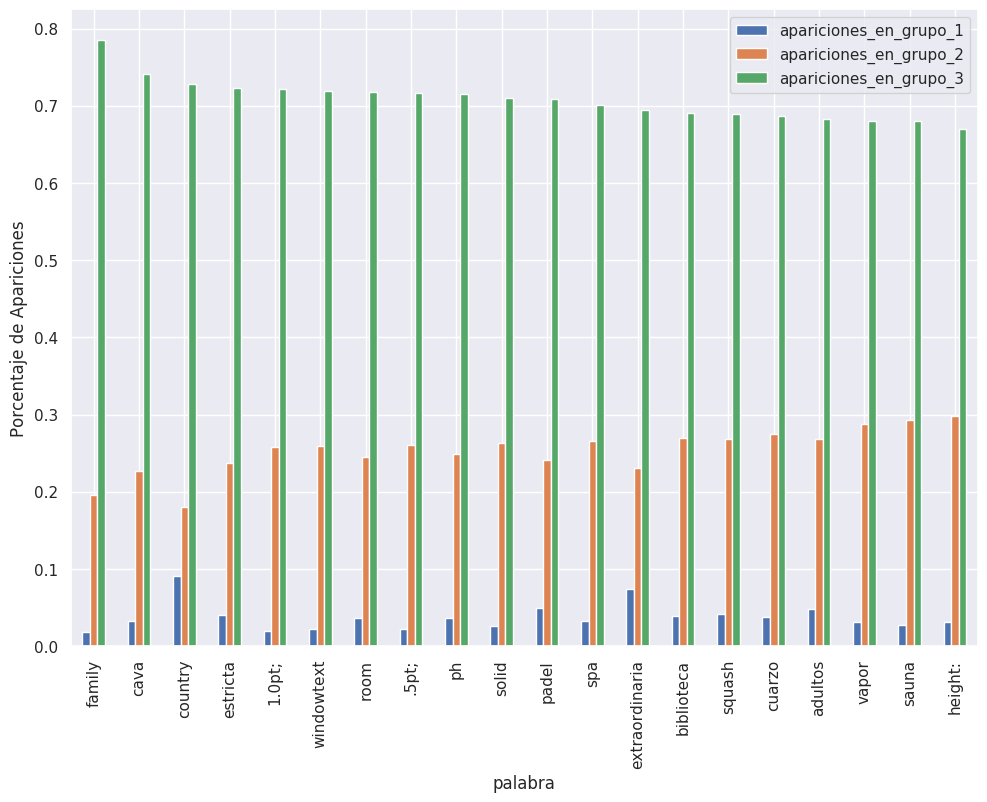

In [43]:
 ax = datos.sort_values(by='apariciones_en_grupo_3',ascending=False).head(20).plot(kind='bar', y=["apariciones_en_grupo_1", "apariciones_en_grupo_2","apariciones_en_grupo_3"])
 ax.set_ylabel('Porcentaje de Apariciones')


Estos graficos nos muestran que hay palabras que, cuando aparecen, suelen aparecer en grupos de propiedades con determinados precios. Las palabras que contiene la descripcion me pueden llegar a ayudar a determinar el precio de una propiedad